In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
data=pd.read_csv(list(uploaded.keys())[0])

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [ ]:
# Display basic information
print(data.head())
print(data.info())
print(data.describe())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [ ]:
# Set visual style
sns.set(style="whitegrid")

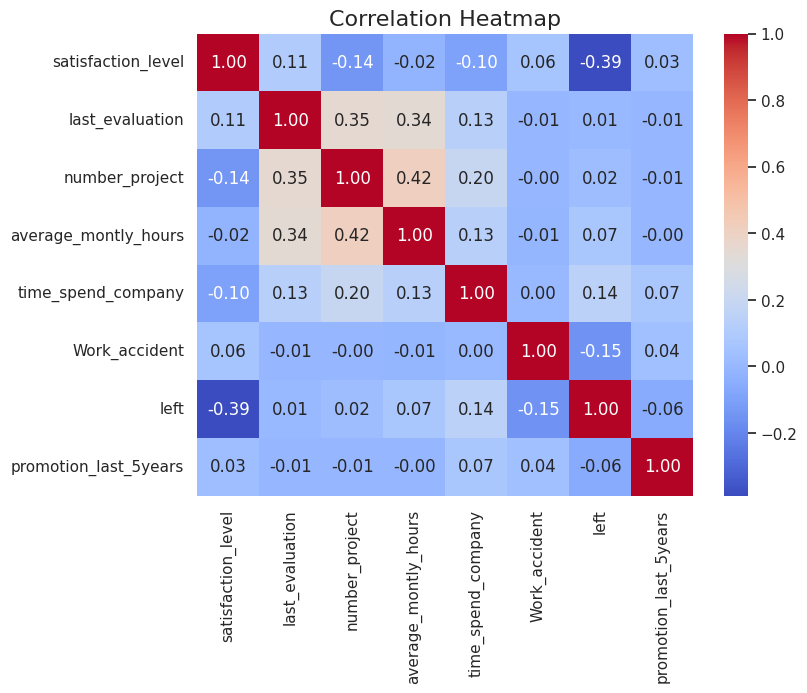

In [ ]:
# Compute correlation matrix
plt.figure(figsize=(8, 6))
numerical_data = data.select_dtypes(include=[np.number])
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
# Boxplots for numerical features vs retention
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<ipython-input-11-8ee8d2f86348>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="left", y="satisfaction_level", palette="cool")


Text(0, 0.5, 'Satisfaction Level')

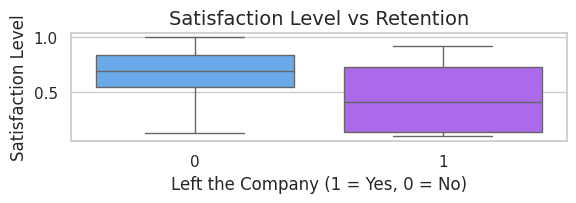

In [ ]:
# Satisfaction Level
plt.subplot(3, 1, 1)
sns.boxplot(data=data, x="left", y="satisfaction_level", palette="cool")
plt.title("Satisfaction Level vs Retention", fontsize=14)
plt.xlabel("Left the Company (1 = Yes, 0 = No)", fontsize=12)
plt.ylabel("Satisfaction Level", fontsize=12)


<ipython-input-12-393a64f18105>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="left", y="last_evaluation", palette="cool")


Text(0, 0.5, 'Last Evaluation Score')

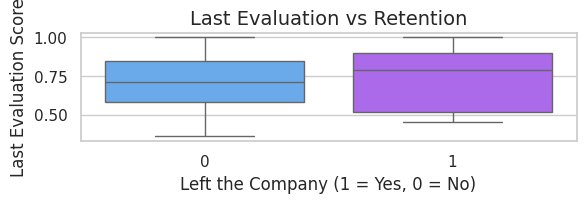

In [ ]:
# Last Evaluation
plt.subplot(3, 1, 2)
sns.boxplot(data=data, x="left", y="last_evaluation", palette="cool")
plt.title("Last Evaluation vs Retention", fontsize=14)
plt.xlabel("Left the Company (1 = Yes, 0 = No)", fontsize=12)
plt.ylabel("Last Evaluation Score", fontsize=12)

<ipython-input-13-b9366e93749f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="left", y="average_montly_hours", palette="cool")


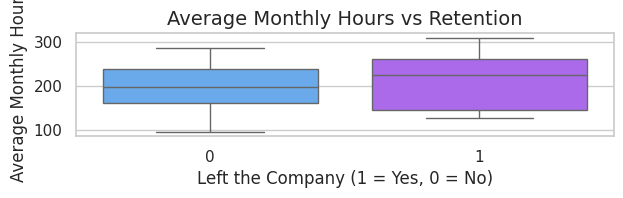

In [ ]:
# Average Monthly Hours
plt.subplot(3, 1, 3)
sns.boxplot(data=data, x="left", y="average_montly_hours", palette="cool")
plt.title("Average Monthly Hours vs Retention", fontsize=14)
plt.xlabel("Left the Company (1 = Yes, 0 = No)", fontsize=12)
plt.ylabel("Average Monthly Hours", fontsize=12)

plt.tight_layout()
plt.show()

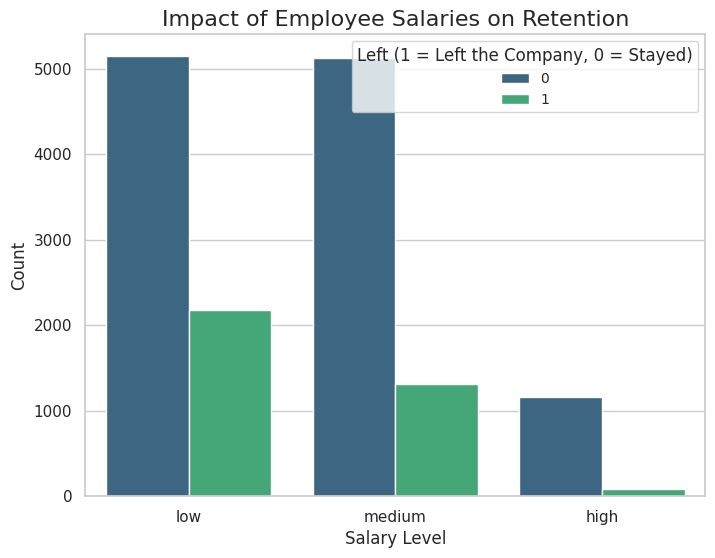

In [ ]:
# Bar chart for salary impact on retention
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="salary", hue="left", palette="viridis")
plt.title("Impact of Employee Salaries on Retention", fontsize=16)
plt.xlabel("Salary Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Left (1 = Left the Company, 0 = Stayed)", fontsize=10)
plt.show()


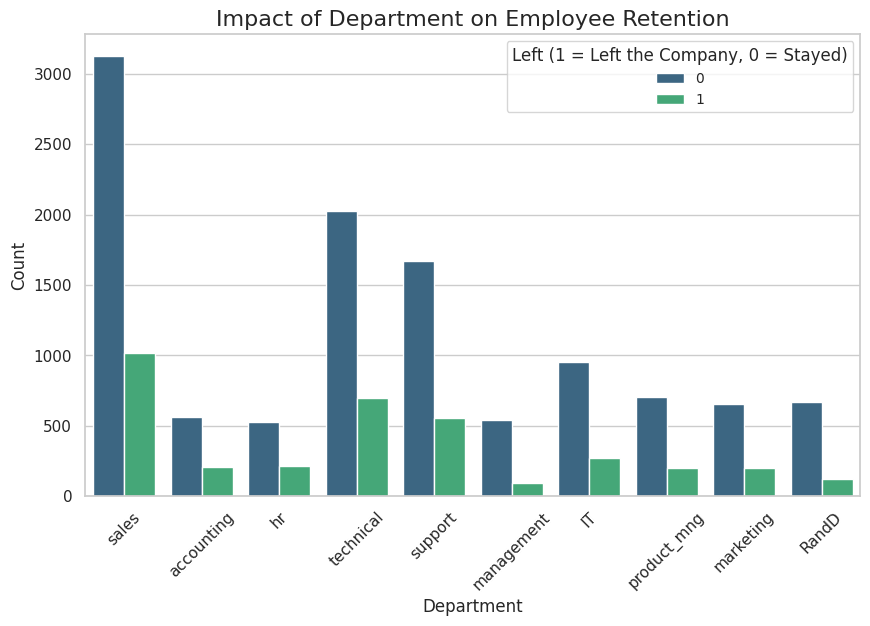

In [ ]:
# Bar chart for department impact on retention
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Department", hue="left", palette="viridis")
plt.title("Impact of Department on Employee Retention", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Left (1 = Left the Company, 0 = Stayed)", fontsize=10)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Select the relevant features for the model
features = ["satisfaction_level", "last_evaluation", "number_project",
            "average_montly_hours", "time_spend_company", "salary"]
X = data[features]
y = data["left"]

# One-hot encode the salary variable
X = pd.get_dummies(X, columns=["salary"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[3170  258]
 [ 811  261]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      3428
           1       0.50      0.24      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.65      0.58      0.59      4500
weighted avg       0.73      0.76      0.73      4500


Accuracy Score: 0.7624444444444445


In [ ]:
# Measure accuracy and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the model:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy of the model: 0.7624444444444445

Confusion Matrix:
 [[3170  258]
 [ 811  261]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      3428
           1       0.50      0.24      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.65      0.58      0.59      4500
weighted avg       0.73      0.76      0.73      4500

